In [1]:
from os import listdir
import numpy as np
from tqdm import tqdm
from os.path import join
import cv2

CAT = ["circle","square","star","triangle"]
IMG_DATA = []
X = []
Y = []
DATA_DIR = "../input/four-shapes/shapes/"

In [2]:

def preprocess():
    for cat in (CAT):
        for img in tqdm(listdir(join(DATA_DIR,cat))):
            imgData=cv2.resize(cv2.imread(join(DATA_DIR,cat,img),cv2.IMREAD_GRAYSCALE),(100,100))
            IMG_DATA.append([imgData,cat])
            
preprocess()

100%|██████████| 3720/3720 [00:14<00:00, 258.51it/s]


In [3]:
from random import shuffle
shuffle(IMG_DATA)
for feature, label in IMG_DATA:
    X.append(feature)
    Y.append(label)


In [4]:
for i in range(len(Y)):
    Y[i]=CAT.index(Y[i])

In [5]:
X=np.array(X)
Y=np.array(Y)
X=X.reshape(-1,100,100,1)



In [6]:
X=X/np.float32(255)

In [7]:
#import tensorflow as tf
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
#with tpu_strategy.scope():
model = Sequential()

model.add(Conv2D(64,(3,3),activation = "relu", input_shape = (100,100,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = "relu" ))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X,Y, batch_size = 256, epochs=7,validation_split=0.2)
    


Epoch 1/7
47/47 [==============================] - 20s 292ms/step - loss: 1.0001 - accuracy: 0.5674 - val_loss: 0.0203 - val_accuracy: 0.9950
Epoch 2/7
47/47 [==============================] - 11s 242ms/step - loss: 0.0322 - accuracy: 0.9883 - val_loss: 0.0115 - val_accuracy: 0.9970
Epoch 3/7
47/47 [==============================] - 11s 242ms/step - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.0048 - val_accuracy: 0.9987
Epoch 4/7
47/47 [==============================] - 11s 242ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0012 - val_accuracy: 0.9993
Epoch 5/7
47/47 [==============================] - 11s 242ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 1.4070e-04 - val_accuracy: 1.0000
Epoch 6/7
47/47 [==============================] - 11s 241ms/step - loss: 6.3238e-04 - accuracy: 1.0000 - val_loss: 6.1368e-05 - val_accuracy: 1.0000
Epoch 7/7
47/47 [==============================] - 11s 242ms/step - loss: 4.8715e-04 - accuracy: 0.9998 - val_loss: 3.6182e-05 - val_acc

In [9]:
model.save("four-shape-model")

In [10]:
from tensorflow.keras.models import load_model
new = load_model("four-shape-model")

In [11]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Star_full.svg/1200px-Star_full.svg.png

--2021-05-04 12:56:36--  https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Star_full.svg/1200px-Star_full.svg.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61325 (60K) [image/png]
Saving to: ‘1200px-Star_full.svg.png’

1200px-Star_full.sv 100%[===================>]  59.89K   355KB/s    in 0.2s    

2021-05-04 12:56:37 (355 KB/s) - ‘1200px-Star_full.svg.png’ saved [61325/61325]



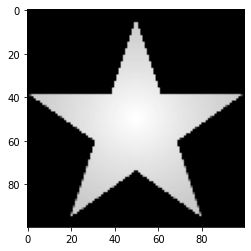

(1, 100, 100, 1)

In [12]:
testData=cv2.resize(cv2.imread("./1200px-Star_full.svg.png",cv2.IMREAD_GRAYSCALE),(100,100))
import matplotlib.pyplot as plt
plt.imshow(testData,cmap="gray")
plt.show()
testData=testData.reshape(1,100,100,1)
testData.shape

In [13]:
pred=new.predict(testData)
print(CAT[np.argmax(pred)])

star
